In [3]:
# This file is used for cell classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix,average_precision_score,precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
import xgboost as xgb
from xgboost import plot_importance, to_graphviz

In [4]:
# Read the data for training and validation
patient_data_dir = "../../data/patent_predict"

mod1_yang_file = f"{patient_data_dir}/yang-211-model-T1.tsv"
mod1_yin_file = f"{patient_data_dir}/yin-189-model-T1.tsv"
mod4_yang_file = f"{patient_data_dir}/yang-211-model-A3.tsv"
mod4_yin_file = f"{patient_data_dir}/yin-189-model-A3.tsv"

mod1_yang_df = pd.read_csv(mod1_yang_file, sep='\t')
mod1_yang_df['type']=1
mod1_yin_df = pd.read_csv(mod1_yin_file, sep='\t')
mod1_yin_df['type']=0
mod4_yang_df = pd.read_csv(mod4_yang_file, sep='\t')
mod4_yang_df['type']=1
mod4_yin_df = pd.read_csv(mod4_yin_file, sep='\t')
mod4_yin_df['type']=0

mod1_df = mod1_yang_df.append(mod1_yin_df)
mod4_df = mod4_yang_df.append(mod4_yin_df)

def getXY(df):
    x = df.drop(columns=['patientID','type'], axis=1)
    #x = df.iloc[:,:-1]
    x['yang_ratio']= x['yang']/(x['yang']+x['yin-yang']+x['yin'])
    x['comb_yang']= x['yang']+x['yin-yang']
    x['yang_ratio2']= (x['yang']+x['yin-yang'])/(x['yang']+x['yin-yang']+x['yin'])  
    y = df['type']
    return(x,y)

/tmp/ipykernel_76341/1440339830.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mod1_df = mod1_yang_df.append(mod1_yin_df)
/tmp/ipykernel_76341/1440339830.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mod4_df = mod4_yang_df.append(mod4_yin_df)


In [5]:
def plot_pr(recall,precision,average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: {0:0.6f}'.format(average_precision))
    plt.show()
    
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

def getQCfeatures(y_ground, y_predict):
    cmatrix = confusion_matrix(y_ground, y_predict).ravel()
    return(getQCfeatures_1(cmatrix))

def getQCfeatures_1(cmatrix):
    tn =cmatrix[0]
    fp =cmatrix[1]
    fn =cmatrix[2]
    tp =cmatrix[3]
    specificity = tn/(tn+fp)*100
    sensitivity = tp/(tp+fn)*100
    precision = tp/(tp+fp) * 100
    npv = tn/(tn+fn)*100
    tpr = tp/(tp+fn)*100
    tnr = tn/(tn+fp)*100
    F1= 2*(precision*tpr)/(precision+tpr)
    Gmean= np.sqrt(sensitivity*specificity)
    return(specificity, sensitivity, precision, npv, tpr, tnr, F1, Gmean)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


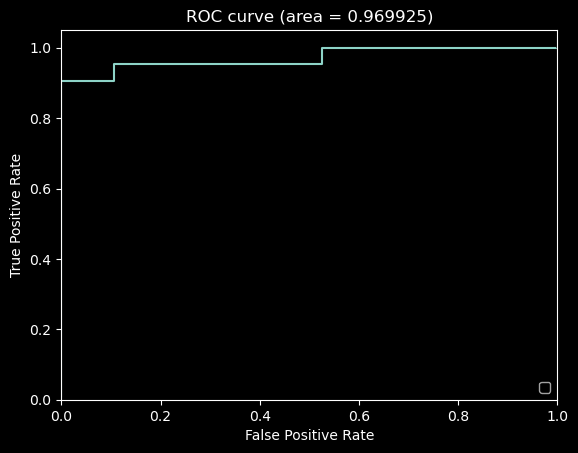

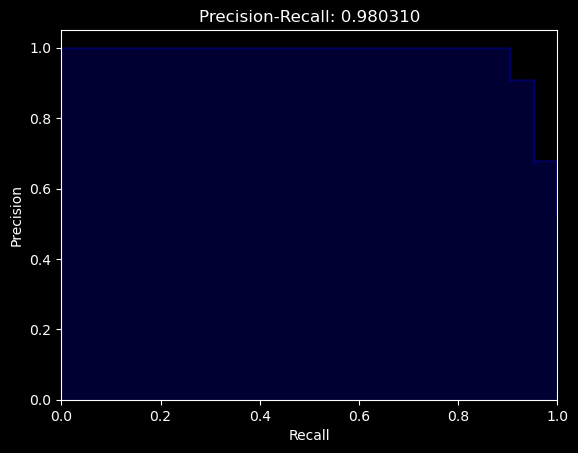

/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Li

logistic

Confusion matrix:
 [[170   0]
 [ 21 169]]
Combined_Confusion matrix:
 [[1699    2]
 [ 206 1693]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (99.88242210464433, 89.15218536071616, 99.88200589970502, 89.18635170603675, 89.15218536071616, 99.88242210464433, 94.21257651641626, 94.36490984338694)
Training AUC: 99.2601 %
Training accuracy: 94.1667 %
Test Confusion matrix:
 [[19  0]
 [ 4 17]]
Test Training AUC: 96.9925 %
Test Training accuracy: 90.0000 %
Average_precision: 0.9803 
total_test_accuracy:93.75,4.7762432936357
total_test_specificity:99.47368421052632,1.5789473684210549
total_test_sensitivity:88.61471861471861,9.341124698516449
total_test_precision:99.52380952380952,1.428571428571432
total_test_npv:89.39835374389149,7.516147272128814
total_test_tpr:88.61471861471861,9.341124698516449
total_test_tnr:99.47368421052632,1.5789473684210549
total_test_F1:93.45455101167552,5.481120118070571
total_test_qmean:93.73480980469898,5.013180533908654


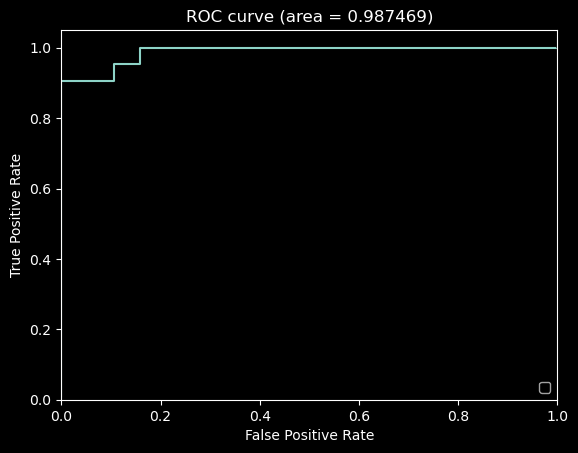

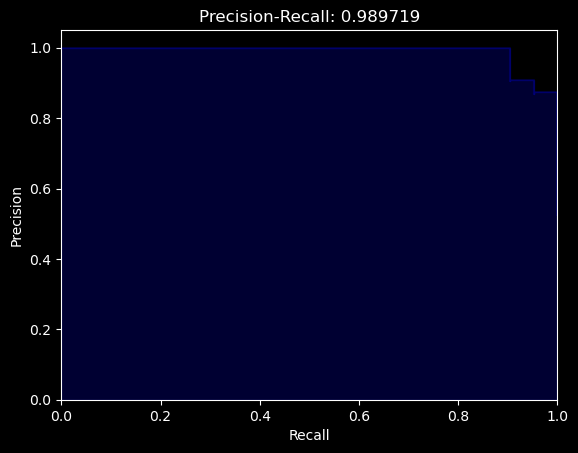

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


svm

Confusion matrix:
 [[169   1]
 [ 22 168]]
Combined_Confusion matrix:
 [[1662   39]
 [ 282 1617]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (97.70723104056437, 85.15007898894154, 97.64492753623189, 85.49382716049382, 85.15007898894154, 97.70723104056437, 90.97046413502107, 91.21281949865829)
Training AUC: 99.4118 %
Training accuracy: 93.6111 %
Test Confusion matrix:
 [[19  0]
 [ 4 17]]
Test Training AUC: 98.7469 %
Test Training accuracy: 90.0000 %
Average_precision: 0.9897 
total_test_accuracy:89.25,7.75
total_test_specificity:96.3157894736842,9.429722561667853
total_test_sensitivity:83.0952380952381,15.446858650770087
total_test_precision:97.3015873015873,6.660995320113422
total_test_npv:85.62186990788743,11.829489941966795
total_test_tpr:83.0952380952381,15.446858650770087
total_test_tnr:96.3157894736842,9.429722561667853
total_test_F1:88.43881396737622,9.307522551050784
total_test_qmean:88.7307487233933,8.394239306955052


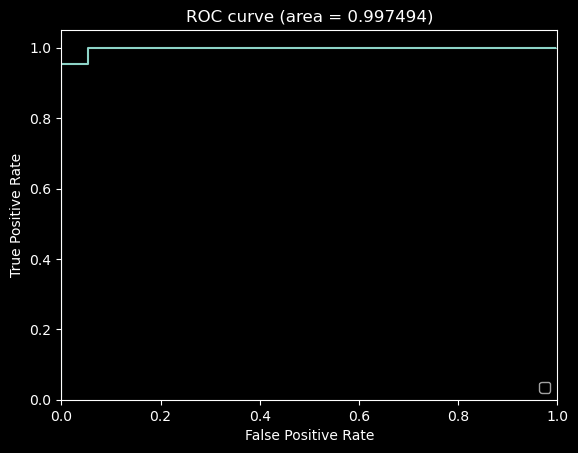

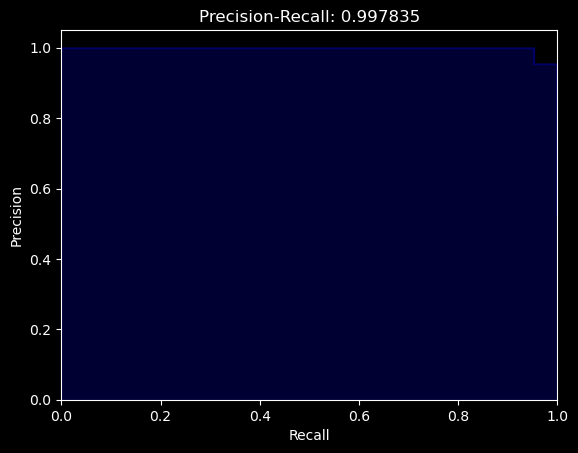

/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


randomforest

Confusion matrix:
 [[170   0]
 [  1 189]]
Combined_Confusion matrix:
 [[1701    0]
 [   4 1895]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (100.0, 99.78936282253818, 100.0, 99.76539589442815, 99.78936282253818, 100.0, 99.89457037427518, 99.89462589275671)
Training AUC: 100.0000 %
Training accuracy: 99.7222 %
Test Confusion matrix:
 [[18  1]
 [ 1 20]]
Test Training AUC: 99.7494 %
Test Training accuracy: 95.0000 %
Average_precision: 0.9978 
total_test_accuracy:97.0,2.179449471770337
total_test_specificity:98.94736842105263,2.10526315789474
total_test_sensitivity:95.25974025974025,4.259672068577477
total_test_precision:99.06926406926407,1.8621009709093634
total_test_npv:95.13135110503531,4.123319081691333
total_test_tpr:95.25974025974025,4.259672068577477
total_test_tnr:98.94736842105263,2.10526315789474
total_test_F1:97.05775515843581,2.2122943994612516
total_test_qmean:97.04918377824417,2.161726559960037


/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

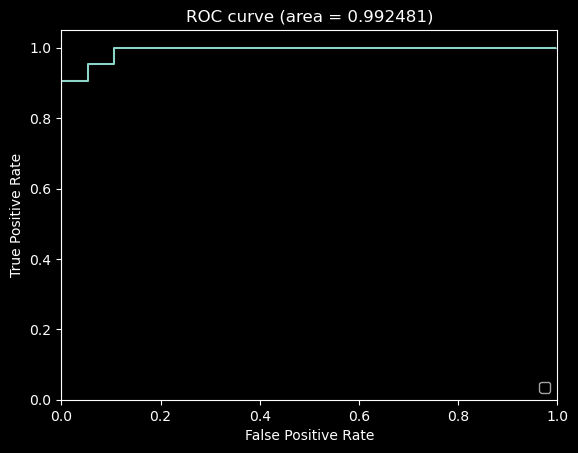

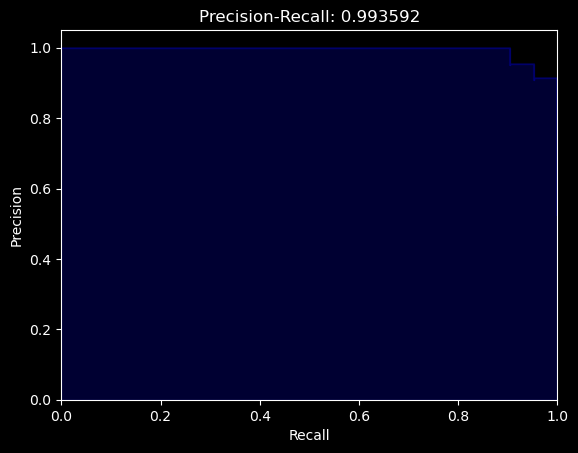

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


xgb

Confusion matrix:
 [[169   1]
 [  5 185]]
Combined_Confusion matrix:
 [[1683   18]
 [  45 1854]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (98.94179894179894, 97.6303317535545, 99.03846153846155, 97.39583333333334, 97.6303317535545, 98.94179894179894, 98.32935560859187, 98.283877899589)
Training AUC: 99.9288 %
Training accuracy: 98.3333 %
Test Confusion matrix:
 [[18  1]
 [ 1 20]]
Test Training AUC: 99.2481 %
Test Training accuracy: 95.0000 %
Average_precision: 0.9936 
total_test_accuracy:97.5,2.23606797749979
total_test_specificity:98.94736842105263,2.10526315789474
total_test_sensitivity:96.2121212121212,4.146872079134334
total_test_precision:99.06926406926407,1.8621009709093634
total_test_npv:96.08373205741626,4.037084706714883
total_test_tpr:96.2121212121212,4.146872079134334
total_test_tnr:98.94736842105263,2.10526315789474
total_test_F1:97.55775515843581,2.2553251099235796
total_test_qmean:97.53728646613075,2.2210307979607546


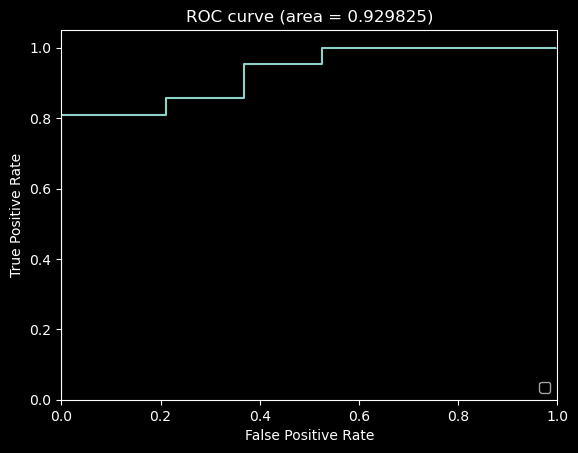

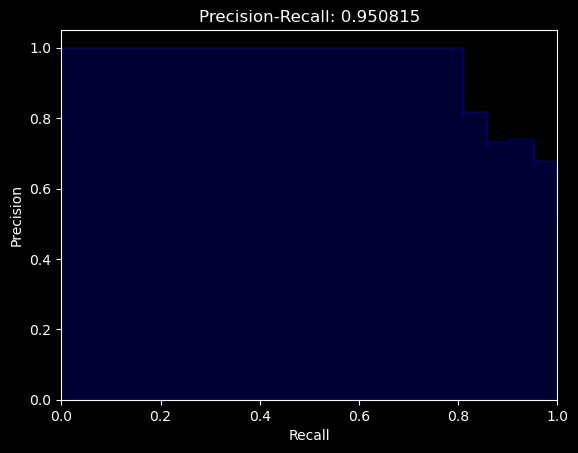

/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Li

logistic

Confusion matrix:
 [[167   3]
 [ 32 158]]
Combined_Confusion matrix:
 [[1664   37]
 [ 317 1582]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (97.82480893592005, 83.30700368615061, 97.71463866584311, 83.9979808177688, 83.30700368615061, 97.82480893592005, 89.93746446844798, 90.27453527225532)
Training AUC: 97.0062 %
Training accuracy: 90.2778 %
Test Confusion matrix:
 [[19  0]
 [ 5 16]]
Test Training AUC: 92.9825 %
Test Training accuracy: 87.5000 %
Average_precision: 0.9508 
total_test_accuracy:90.0,4.183300132670378
total_test_specificity:97.89473684210526,3.4911839898477908
total_test_sensitivity:82.96536796536796,8.221718371865052
total_test_precision:97.9395933014354,3.2704006098520395
total_test_npv:84.27594265637742,6.810378280179377
total_test_tpr:82.96536796536796,8.221718371865052
total_test_tnr:97.89473684210526,3.4911839898477908
total_test_F1:89.56119514514296,4.682361728340778
total_test_qmean:89.97422573324438,4.268267418551687


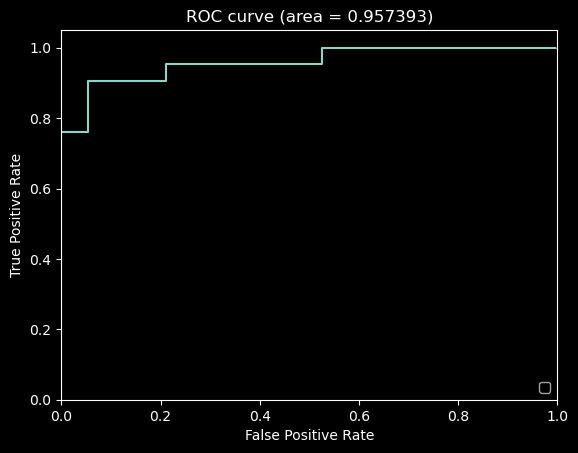

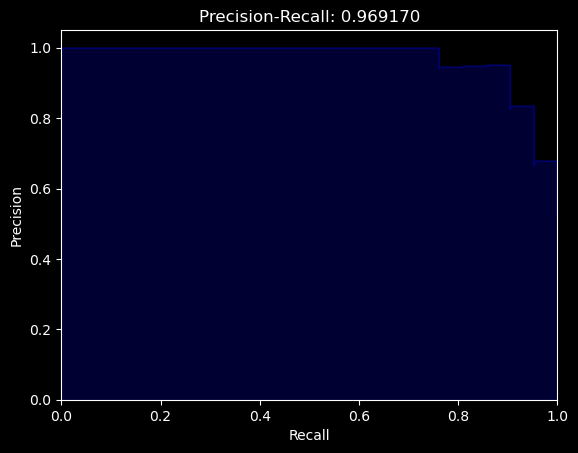

svm

Confusion matrix:
 [[ 92  78]
 [  3 187]]
Combined_Confusion matrix:
 [[1336  365]
 [ 241 1658]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (78.54203409758965, 87.30911005792522, 81.95748887790411, 84.71781864299302, 87.30911005792522, 78.54203409758965, 84.54869964303927, 82.8096316813435)
Training AUC: 97.1084 %
Training accuracy: 77.5000 %
Test Confusion matrix:
 [[ 9 10]
 [ 0 21]]
Test Training AUC: 95.7393 %
Test Training accuracy: 75.0000 %
Average_precision: 0.9692 
total_test_accuracy:83.75,10.854146673046206
total_test_specificity:79.4736842105263,28.28916768500355
total_test_sensitivity:87.66233766233766,12.823282478658992
total_test_precision:87.34591697459969,15.71606610545207
total_test_npv:88.95282688326166,10.750935330720829
total_test_tpr:87.66233766233766,12.823282478658992
total_test_tnr:79.4736842105263,28.28916768500355
total_test_F1:85.5722902828166,8.345059358413806
total_test_qmean:80.78736395398317,14.98659392975818


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


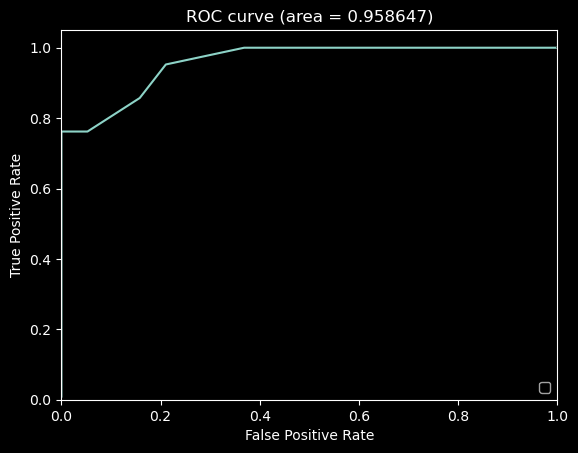

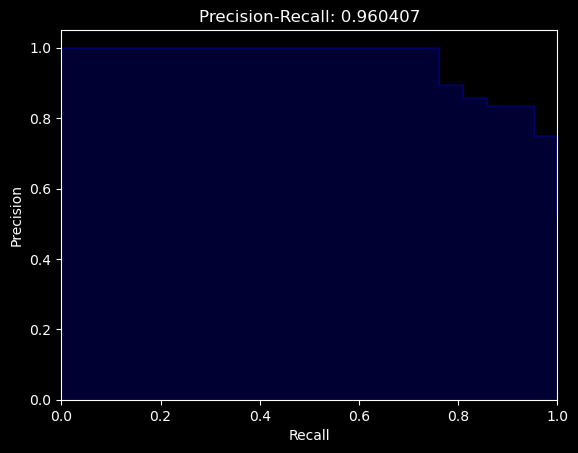

/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


randomforest

Confusion matrix:
 [[168   2]
 [  4 186]]
Combined_Confusion matrix:
 [[1694    7]
 [  21 1878]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (99.58847736625515, 98.89415481832543, 99.62864721485411, 98.77551020408163, 98.89415481832543, 99.58847736625515, 99.26004228329809, 99.2407088788655)
Training AUC: 99.9427 %
Training accuracy: 98.3333 %
Test Confusion matrix:
 [[18  1]
 [ 5 16]]
Test Training AUC: 95.8647 %
Test Training accuracy: 85.0000 %
Average_precision: 0.9604 
total_test_accuracy:91.0,4.898979485566356
total_test_specificity:93.1578947368421,5.289408221642575
total_test_sensitivity:89.0909090909091,7.401964480170215
total_test_precision:93.63483390721242,4.705160714014486
total_test_npv:88.90455630279294,6.708222975590241
total_test_tpr:89.0909090909091,7.401964480170215
total_test_tnr:93.1578947368421,5.289408221642575
total_test_F1:91.13962456824505,5.082915097121526
total_test_qmean:90.99846981567921,4.93552177922136


/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/home/hqyone/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor o

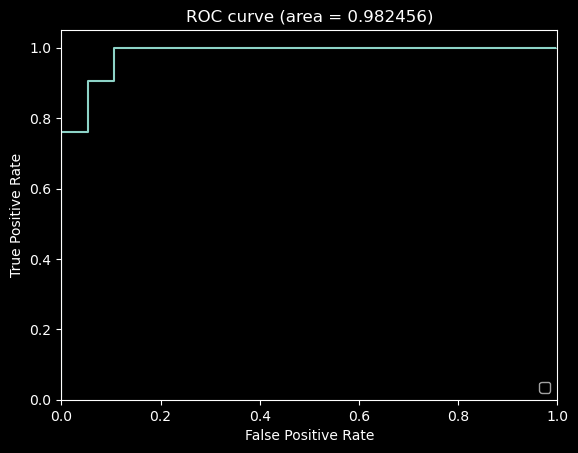

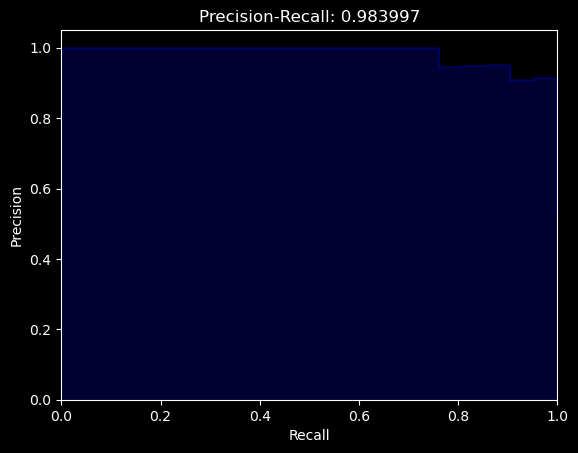

xgb

Confusion matrix:
 [[160  10]
 [ 10 180]]
Combined_Confusion matrix:
 [[1612   89]
 [ 130 1769]]
specificity, sensitivity, precision, npv, tpr, tnr, F1: (94.76778365667255, 93.15429173249078, 95.20990312163616, 92.53731343283582, 93.15429173249078, 94.76778365667255, 94.17088102209208, 93.95757428539355)
Training AUC: 98.8111 %
Training accuracy: 94.4444 %
Test Confusion matrix:
 [[18  1]
 [ 3 18]]
Test Training AUC: 98.2456 %
Test Training accuracy: 90.0000 %
Average_precision: 0.9840 
total_test_accuracy:92.5,4.183300132670378
total_test_specificity:93.15789473684211,6.249653730019956
total_test_sensitivity:91.92640692640693,5.252252700538528
total_test_precision:93.93620414673046,5.136876362143536
total_test_npv:91.45185881370091,5.053522737256841
total_test_tpr:91.92640692640693,5.252252700538528
total_test_tnr:93.15789473684211,6.249653730019956
total_test_F1:92.79756727799835,4.056399712146244
total_test_qmean:92.45358039582679,4.290658293663191


In [7]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
def CrossValidation(x, y, model_type, n_splits=10, seed=72):
    np.random.seed(seed)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    #skf.get_n_splits(x, y)
    
    total_test_accuracy = []
    total_test_sensitivity = []
    total_test_specificity = []
    total_test_precision = []
    total_test_npv = []
    total_test_tpr = []
    total_test_tnr = []
    total_test_F1 = []
    total_test_Gmean=[]
    total_test_auc_roc = []
    total_average_precision = []
    combined_confusion_matrix = [[0,0],[0,0]]
    for train_index, test_index in skf.split(x, y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Select models
        model1 = None
        # possible methods : logistic, svm, randomforest, xgb
        if (model_type=="logistic"):
            scaler = StandardScaler()
            lr = LogisticRegression()
            model1 = Pipeline([('standardize', scaler),
                                ('log_reg', lr)])
            model1.fit(X_train, y_train)
        elif (model_type == "svm"):
            model1 = svm.LinearSVC()
            model1.fit(X_train, y_train)
        elif (model_type == "randomforest"):
            model1 = RandomForestClassifier(n_estimators=10, random_state=42)
            model1.fit(X_train, y_train)
        elif (model_type == "xgb"):
            learning_rate =0.05
            w=1
            model1 = xgb.XGBClassifier(
                        learning_rate=learning_rate,
                        n_estimators=1000,
                        max_depth=4,
                        min_child_weight=4,
                        gamma=0.6,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_alpha=5e-05,
                        objective='binary:logistic',
                        nthread=20,
                        scale_pos_weight=w,
                        seed=27)
            eval_set = [(X_train, y_train), (X_test, y_test)]
            model1.fit(X_train,
                    y_train,
                    early_stopping_rounds=25,
                    eval_metric=['auc','error','logloss'],
                    eval_set=eval_set,
                    verbose=False)
        else:
            print(f"The model_type {model_type} is not expected, exit!")
        if model1:
            y_train_hat = model1.predict(X_train)
            y_train_hat_probs = None
            if model_type=="svm":
                y_train_hat_probs = model1._predict_proba_lr(X_train)[:,1]
                y_test_hat_probs = model1._predict_proba_lr(X_test)[:,1]
                y_pred_proba = model1._predict_proba_lr(X_test)[::,1]
            else:
                y_train_hat_probs = model1.predict_proba(X_train)[:,1]
                y_test_hat_probs = model1.predict_proba(X_test)[:,1]
                y_pred_proba = model1.predict_proba(X_test)[::,1]
                

            train_accuracy = accuracy_score(y_train, y_train_hat)*100
            train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100
            

            y_test_hat = model1.predict(X_test)

            test_accuracy = accuracy_score(y_test, y_test_hat)*100
            test_specificity, test_sensitivity, test_precision, test_npv, test_tpr, test_tnr, test_F1, test_gmena = getQCfeatures(y_test, y_test_hat)
            
            test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100
            total_test_auc_roc.append(test_auc_roc)
            
            fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

            y_scores = y_pred_proba
            roc_auc = auc(fpr, tpr)
            
            average_precision = average_precision_score(y_test, y_scores)
            total_average_precision.append(average_precision)
            precision, recall, _ = precision_recall_curve(y_test, y_scores)
            
            total_test_accuracy.append(test_accuracy)
            total_test_sensitivity.append(test_sensitivity)
            total_test_specificity.append(test_specificity)
            total_test_precision.append(test_precision)
            total_test_npv.append(test_npv)
            total_test_tpr.append(test_tpr)
            total_test_tnr.append(test_tnr)
            total_test_F1.append(test_F1)
            total_test_Gmean.append(test_gmena)
            combined_confusion_matrix = np.add(combined_confusion_matrix, confusion_matrix(y_train, y_train_hat))

    plot_roc(fpr, tpr, roc_auc)
    plot_pr(recall,precision,average_precision)

    #create ROC curve
    # plt.plot(fpr,tpr)
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()
    report_str =""
    if len(total_test_accuracy)>0:
        print(f'{model_type}\n')
        print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
        print('Combined_Confusion matrix:\n', combined_confusion_matrix)
        print('specificity, sensitivity, precision, npv, tpr, tnr, F1:', getQCfeatures_1(combined_confusion_matrix.ravel()))
        print('Training AUC: %.4f %%' % train_auc_roc)
        print('Training accuracy: %.4f %%' % train_accuracy)

        print('Test Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
        print('Test Training AUC: %.4f %%' % test_auc_roc)
        print('Test Training accuracy: %.4f %%' % test_accuracy)
        print('Average_precision: %.4f ' % float(average_precision))

        print(f'total_test_accuracy:{np.mean(total_test_accuracy)},{np.std(total_test_accuracy)}')
        print(f'total_test_specificity:{np.mean(total_test_specificity)},{np.std(total_test_specificity)}')
        print(f'total_test_sensitivity:{np.mean(total_test_sensitivity)},{np.std(total_test_sensitivity)}')
        print(f'total_test_precision:{np.mean(total_test_precision)},{np.std(total_test_precision)}')
        print(f'total_test_npv:{np.mean(total_test_npv)},{np.std(total_test_npv)}')
        print(f'total_test_tpr:{np.mean(total_test_tpr)},{np.std(total_test_tpr)}')
        print(f'total_test_tnr:{np.mean(total_test_tnr)},{np.std(total_test_tnr)}')
        print(f'total_test_F1:{np.mean(total_test_F1)},{np.std(total_test_F1)}')
        print(f'total_test_qmean:{np.mean(total_test_Gmean)},{np.std(total_test_Gmean)}')
        
        report_str+=f'{round(train_auc_roc,3)}\t{round(train_accuracy,3)}\t'
        report_str+=f'{round(np.mean(total_test_auc_roc),3)},{round(np.std(total_test_auc_roc),3)}\t'
        report_str+=f'{round(np.mean(total_average_precision),3)},{round(np.std(total_average_precision),3)}\t'
        report_str+=f'{round(np.mean(total_test_accuracy),3)},{round(np.std(total_test_accuracy),3)}\t'
        report_str+=f'{round(np.mean(total_test_specificity),3)},{round(np.std(total_test_specificity),3)}\t'
        report_str+=f'{round(np.mean(total_test_sensitivity),3)},{round(np.std(total_test_sensitivity),3)}\t'
        report_str+=f'{round(np.mean(total_test_precision),3)},{round(np.std(total_test_precision),3)}\t'
        report_str+=f'{round(np.mean(total_test_npv),3)},{round(np.std(total_test_npv),3)}\t'
        report_str+=f'{round(np.mean(total_test_tpr),3)},{round(np.std(total_test_tpr),3)}\t'
        report_str+=f'{round(np.mean(total_test_tnr),3)},{round(np.std(total_test_tnr),3)}\t'
        report_str+=f'{round(np.mean(total_test_F1),3)},{round(np.std(total_test_F1),3)}'
        report_str+=f'{round(np.mean(total_test_Gmean),3)},{round(np.std(total_test_Gmean),3)}'

    return (report_str)

def runReg_CrossValidation(df,model_type,n_splits=10, seed=120):
    (x, y) =getXY(df)
    return(CrossValidation(x, y,model_type,n_splits, seed))

# possible methods : logistic, svm, randomforest, xgb
# runReg_CrossValidation(mod1_df, "svm",seed=200)
out_file="/home/hqyone/mnt/2tb/github/cancer_rcnn/data/output/patient_predict/summary_mod4.tsv"
with open(out_file,'w') as OUT:
    methods = ["logistic", "svm", "randomforest", "xgb"]
    OUT.write("method\ttrain_auc_roc\ttrain_accuracy\ttest_auc_roc\taverage_precision\ttotal_test_accuracy\ttotal_test_specificity\ttotal_test_sensitivity\ttotal_test_precision\ttotal_test_npv\ttotal_test_tpr\ttotal_test_tnr\ttotal_test_F1\n")
    for method in methods:
        OUT.write(method+"\t"+runReg_CrossValidation(mod4_df, method, n_splits=10, seed=200)+'\n')

out_file="/home/hqyone/mnt/2tb/github/cancer_rcnn/data/output/patient_predict/summary_mod1.tsv"
with open(out_file,'w') as OUT:
    methods = ["logistic", "svm", "randomforest", "xgb"]
    OUT.write("method\ttrain_auc_roc\ttrain_accuracy\ttest_auc_roc\taverage_precision\ttotal_test_accuracy\ttotal_test_specificity\ttotal_test_sensitivity\ttotal_test_precision\ttotal_test_npv\ttotal_test_tpr\ttotal_test_tnr\ttotal_test_F1\n")
    for method in methods:
        OUT.write(method+"\t"+runReg_CrossValidation(mod1_df, method,n_splits=10, seed=200)+'\n')

In [14]:
combined_confusion_matrix = [[0,0],[0,0]]
combined_confusion_matrix +combined_confusion_matrix

[[0, 0], [0, 0], [0, 0], [0, 0]]

In [18]:
from sklearn import svm
def svmReg(x, y, seed=72):
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(x, y)
    svm_regr = svm.LinearSVC()
    svm_regr.fit(X_train, y_train)
    y_train_hat = svm_regr.predict(X_train)
    y_train_hat_probs = svm_regr._predict_proba_lr(X_train)[:,1]

    train_accuracy = accuracy_score(y_train, y_train_hat)*100
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

    y_test_hat = svm_regr.predict(X_test)
    y_test_hat_probs = svm_regr._predict_proba_lr(X_test)[:,1]

    test_accuracy = accuracy_score(y_test, y_test_hat)*100
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

    y_pred_proba = svm_regr._predict_proba_lr(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    y_scores = y_pred_proba
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_scores)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    
    plot_roc(fpr, tpr, roc_auc)
    plot_pr(recall,precision,average_precision)

    #create ROC curve
    # plt.plot(fpr,tpr)
    # plt.ylabel('True Positive Rate')
    # plt.xlabel('False Positive Rate')
    # plt.show()

    print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
    print('Training AUC: %.4f %%' % train_auc_roc)
    print('Training accuracy: %.4f %%' % train_accuracy)

    print('Test Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
    print('Test Training AUC: %.4f %%' % test_auc_roc)
    print('Test Training accuracy: %.4f %%' % test_accuracy)
    print('Average_precision: %.4f ' % float(average_precision))

    return (train_auc_roc, train_accuracy, test_auc_roc, test_accuracy)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

def RandomForestReg(x, y, seed=72):
    np.random.seed(seed)
    X_train, X_test, y_train, y_test = train_test_split(x, y)

    rfc = RandomForestClassifier(n_estimators=10, random_state=42)
    rfc.fit(X_train, y_train)
    Y_pred = rfc.predict_proba(X_test)
    y_scores = Y_pred[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_scores)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    y_train_hat = rfc.predict(X_train)
    y_train_hat_probs = rfc.predict_proba(X_train)[:,1]
    train_accuracy = accuracy_score(y_train, y_train_hat)*100
    train_auc_roc = roc_auc_score(y_train, y_train_hat_probs)*100

    y_test_hat = rfc.predict(X_test)
    y_test_hat_probs = rfc.predict_proba(X_test)[:,1]
    test_accuracy = accuracy_score(y_test, y_test_hat)*100
    test_auc_roc = roc_auc_score(y_test, y_test_hat_probs)*100

    y_pred_proba = rfc.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    plot_roc(fpr, tpr, roc_auc)
    plot_pr(recall,precision,average_precision)

    print('Confusion matrix:\n', confusion_matrix(y_train, y_train_hat))
    print('Training AUC: %.4f %%' % train_auc_roc)
    print('Training accuracy: %.4f %%' % train_accuracy)

    print('Test Confusion matrix:\n', confusion_matrix(y_test, y_test_hat))
    print('Test Training AUC: %.4f %%' % test_auc_roc)
    print('Test Training accuracy: %.4f %%' % test_accuracy)
    print('Average_precision: %.4f ' % float(average_precision))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


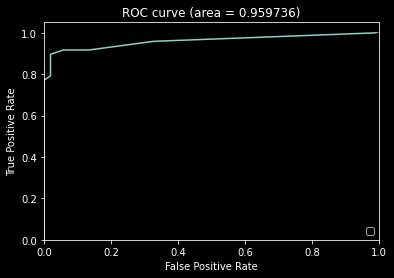

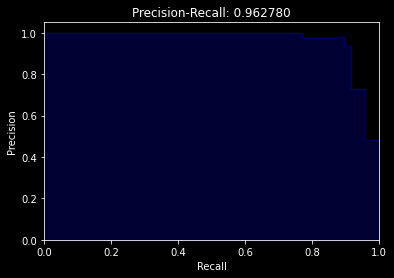

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion matrix:
 [[136   1]
 [  2 161]]
Training AUC: 99.9798 %
Training accuracy: 99.0000 %
Test Confusion matrix:
 [[51  1]
 [ 6 42]]
Test Training AUC: 95.9736 %
Test Training accuracy: 93.0000 %
Average_precision: 0.9628 


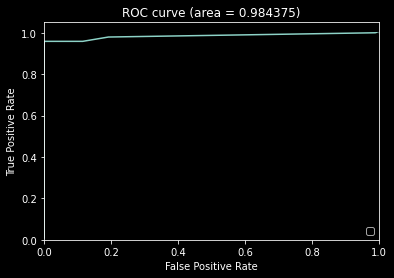

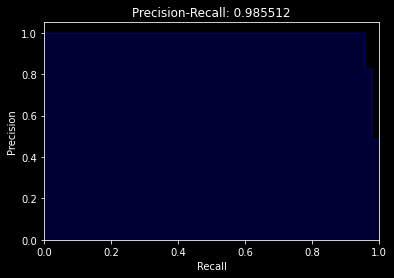

Confusion matrix:
 [[137   0]
 [  2 161]]
Training AUC: 100.0000 %
Training accuracy: 99.3333 %
Test Confusion matrix:
 [[50  2]
 [ 2 46]]
Test Training AUC: 98.4375 %
Test Training accuracy: 96.0000 %
Average_precision: 0.9855 


In [20]:
def getRandomForestAcc(df, seed=120):
    (x, y) =getXY(df)
    RandomForestReg(x, y,seed)

getRandomForestAcc(mod1_df, seed=200)
getRandomForestAcc(mod4_df, seed=200)

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,\n            ...\n            390, 391, 392, 393, 394, 395, 396, 397, 398, 399],\n           dtype='int64', length=360)] are in the [columns]"

No handles with labels found to put in legend.


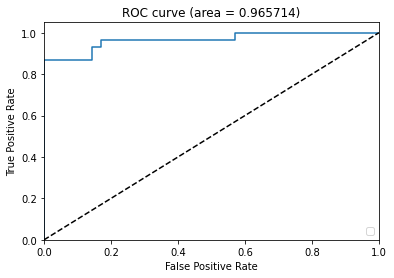

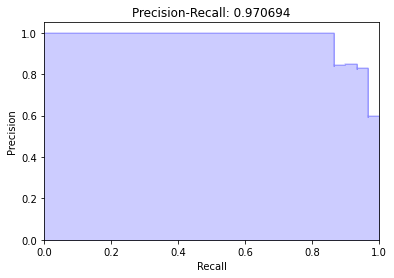

No handles with labels found to put in legend.


Confusion matrix:
 [[99  3]
 [24 66]]
Training AUC: 96.2963 %
Training accuracy: 85.9375 %
Test Confusion matrix:
 [[35  0]
 [ 4 26]]
Test Training AUC: 96.5714 %
Test Training accuracy: 93.8462 %
Average_precision: 0.9707 


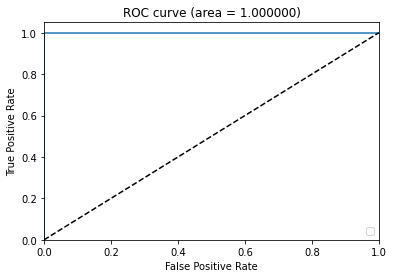

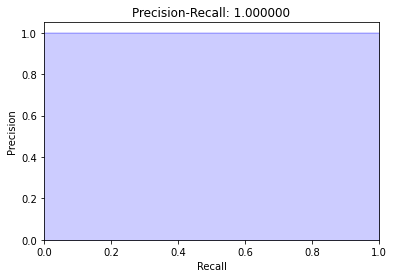

Confusion matrix:
 [[102   0]
 [ 12  78]]
Training AUC: 99.9346 %
Training accuracy: 93.7500 %
Test Confusion matrix:
 [[35  0]
 [ 1 29]]
Test Training AUC: 100.0000 %
Test Training accuracy: 98.4615 %
Average_precision: 1.0000 


In [8]:
def getLogisticAcc(df,seed=72):
    (x, y) =getXY(df)
    logisticReg(x, y,seed)
    
getLogisticAcc(mod1_df, 72)
getLogisticAcc(mod4_df, 72)

/home/hqyone/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
No handles with labels found to put in legend.


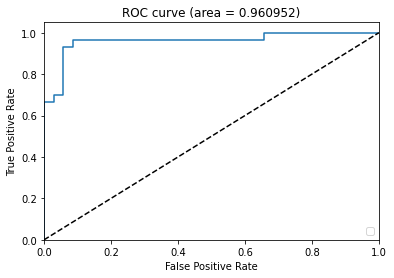

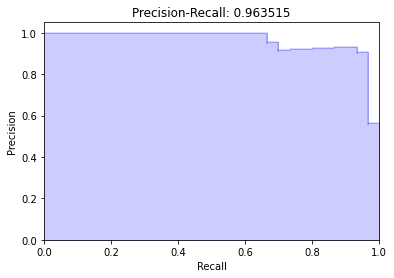

/home/hqyone/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
No handles with labels found to put in legend.


Confusion matrix:
 [[96  6]
 [13 77]]
Training AUC: 95.8932 %
Training accuracy: 90.1042 %
Test Confusion matrix:
 [[33  2]
 [ 4 26]]
Test Training AUC: 96.0952 %
Test Training accuracy: 90.7692 %
Average_precision: 0.9635 


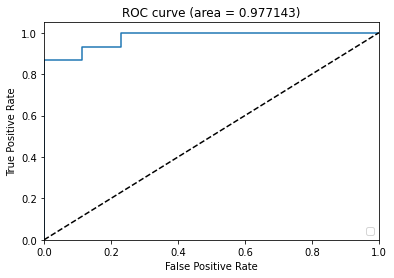

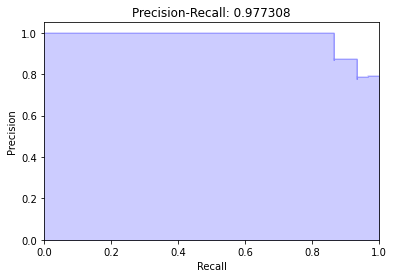

Confusion matrix:
 [[102   0]
 [ 20  70]]
Training AUC: 99.7277 %
Training accuracy: 89.5833 %
Test Confusion matrix:
 [[35  0]
 [ 6 24]]
Test Training AUC: 97.7143 %
Test Training accuracy: 90.7692 %
Average_precision: 0.9773 


In [9]:
def getSVMAcc(mdf,seed=72):
    (x, y) =getXY(mdf)
    svmReg(x, y,seed=seed)

getSVMAcc(mod1_df, seed=45)
getSVMAcc(mod4_df, seed=45)